## Peter Pan Book Emotion Detection Results
### *Threshold=0.4*

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [2]:
# pd.set_option('display.max_rows', 200)

In [3]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [4]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [5]:
og_df = pd.read_csv("data/peter_pan_labelled_novel_dataset.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,on ordinary occasions the boys would have swum...,joy,24
1,"what is it? he cried, shrinking",fear,35
2,she drifted in one direction and he was borne ...,joy,24
3,"'thank you, peter.'",thankfulness,28
4,i don't want to go to school and learn solemn ...,love,26


In [6]:
og_df

,text,emotions,count
0,on ordinary occasions the boys would have swum...,joy,24
1,"what is it? he cried, shrinking",fear,35
2,she drifted in one direction and he was borne ...,joy,24
3,"'thank you, peter.'",thankfulness,28
4,i don't want to go to school and learn solemn ...,love,26
...,...,...,...
176,"Mr. Darling woke to share her bliss, and Nana ...",joy,24
177,"Then he burst into tears, and the truth came out.",sadness,43
178,I should love you in a beard; and Mrs. Darling...,love,26
179,"How lovely, cried Wendy so longingly that Mrs....",love,26


In [7]:
len(og_df)

181

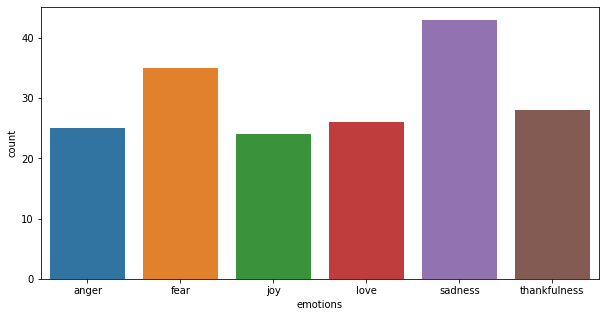

In [8]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [9]:
pred_df = pd.read_csv("results/peter_pan_emotions_041121_171035.csv")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100
2,she drifted in one direction and he was borne ...,0.362,0.503,0.267,0.568,0.953,0.133
3,"'thank you, peter.'",0.472,0.072,0.136,0.025,0.043,0.738
4,i don't want to go to school and learn solemn ...,0.537,0.546,0.603,0.690,0.218,0.456


In [10]:
len(pred_df)

181

# Model Threshold = 0.4

In [11]:
THRESH = 0.4

In [12]:
pred_df["joy_cat"] = (pred_df['joy'] > THRESH).astype(int)
pred_df["sadness_cat"] = (pred_df['sadness'] > THRESH).astype(int)
pred_df["anger_cat"] = (pred_df['anger'] > THRESH).astype(int)
pred_df["love_cat"] = (pred_df['love'] > THRESH).astype(int)
pred_df["thankfulness_cat"] = (pred_df['thankfulness'] > THRESH).astype(int)
pred_df["fear_cat"] = (pred_df['fear'] > THRESH).astype(int)

In [13]:
pred_df.head(2)

,text,joy,sadness,anger,love,thankfulness,fear,joy_cat,sadness_cat,anger_cat,love_cat,thankfulness_cat,fear_cat
0,on ordinary occasions the boys would have swum...,0.740,0.924,0.091,0.353,0.374,0.228,1,1,0,0,0,0
1,"what is it? he cried, shrinking",0.297,0.226,0.943,0.835,0.778,0.100,0,0,1,1,1,0


## Joining Dataframe

In [14]:
join_df = pd.merge(og_df, pred_df, on='text', how='left')

In [15]:
result_df = join_df.drop_duplicates()

In [16]:
print(f"Original Data: {len(og_df)}")
print(f"Pred Data: {len(pred_df)}")
print(f"Join Data: {len(result_df)}")

Original Data: 181
Pred Data: 181
Join Data: 181


In [17]:
pred_list = []
for index, row in join_df.iterrows():
    text = row['text']
    if row["emotions"] == "anger" and row["anger_cat"] == 1:
        pred = "anger"
    if row["emotions"] == "fear" and row["fear_cat"] == 1:
        pred = "fear"
    if row["emotions"] == "joy" and row["joy_cat"] == 1:
        pred = "joy"
    if row["emotions"] == "love" and row["love_cat"] == 1:
        pred = "love"
    if row["emotions"] == "sadness" and row["sadness_cat"] == 1:
        pred = "sadness"
    if row["emotions"] == "thankfulness" and row["thankfulness_cat"] == 1:
        pred = "thankfulness"
    else:
        if row["anger_cat"] == 1:
            pred = "anger"
        if row["fear_cat"] == 1:
            pred = "fear"
        if row["joy_cat"] == 1:
            pred = "joy"
        if row["love_cat"] == 1:
            pred = "love"
        if row["sadness_cat"] == 1:
            pred = "sadness"
        if row["thankfulness_cat"] == 1:
            pred = "thankfulness"
    pred_list.append({"text": text, "pred": pred})

In [18]:
pred_df = pd.DataFrame(pred_list)

In [19]:
len(pred_df)

181

In [20]:
pred_df

,text,pred
0,on ordinary occasions the boys would have swum...,sadness
1,"what is it? he cried, shrinking",thankfulness
2,she drifted in one direction and he was borne ...,thankfulness
3,"'thank you, peter.'",joy
4,i don't want to go to school and learn solemn ...,sadness
...,...,...
176,"Mr. Darling woke to share her bliss, and Nana ...",sadness
177,"Then he burst into tears, and the truth came out.",sadness
178,I should love you in a beard; and Mrs. Darling...,sadness
179,"How lovely, cried Wendy so longingly that Mrs....",sadness


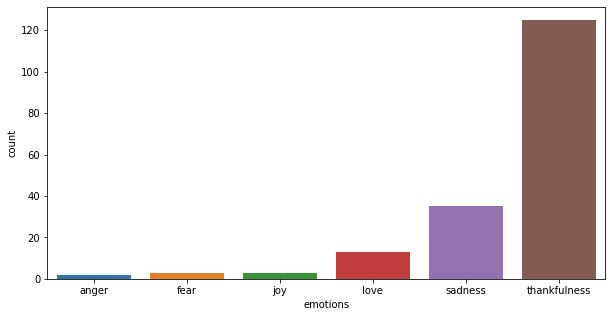

In [21]:
pred_df["count"] = pred_df["pred"].groupby(pred_df["pred"]).transform("count")
display_bar_chart(pred_df, emotion_col="pred", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [22]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [23]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [24]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [25]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [26]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [27]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,24,2
1,"what is it? he cried, shrinking",fear,35,1
2,she drifted in one direction and he was borne ...,joy,24,2
3,"'thank you, peter.'",thankfulness,28,5
4,i don't want to go to school and learn solemn ...,love,26,3


### Categorize Emotions column (Predicted dataset)

In [28]:
pred_df.dtypes

text     object
pred     object
count     int64
dtype: object

In [29]:
pred_df["pred"] = pred_df["pred"].astype('category')

In [30]:
category_dict = dict(sorted(zip(pred_df.pred.cat.codes, pred_df.pred)))

In [31]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [32]:
pred_df.dtypes

text       object
pred     category
count       int64
dtype: object

In [33]:
pred_df["pred_cat"] = pred_df["pred"].cat.codes

In [34]:
og_df.head()

,text,emotions,count,emotions_cat
0,on ordinary occasions the boys would have swum...,joy,24,2
1,"what is it? he cried, shrinking",fear,35,1
2,she drifted in one direction and he was borne ...,joy,24,2
3,"'thank you, peter.'",thankfulness,28,5
4,i don't want to go to school and learn solemn ...,love,26,3


In [35]:
pred_df.head()

,text,pred,count,pred_cat
0,on ordinary occasions the boys would have swum...,sadness,35,4
1,"what is it? he cried, shrinking",thankfulness,125,5
2,she drifted in one direction and he was borne ...,thankfulness,125,5
3,"'thank you, peter.'",joy,3,2
4,i don't want to go to school and learn solemn ...,sadness,35,4


## Confusion Matrix

In [36]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["pred_cat"])

In [37]:
confusion

array([[ 0,  0,  2,  1,  5, 17],
       [ 2,  1,  0,  0,  5, 27],
       [ 0,  0,  0,  2,  5, 17],
       [ 0,  1,  0,  5,  5, 15],
       [ 0,  1,  0,  4, 12, 26],
       [ 0,  0,  1,  1,  3, 23]], dtype=int64)

In [38]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

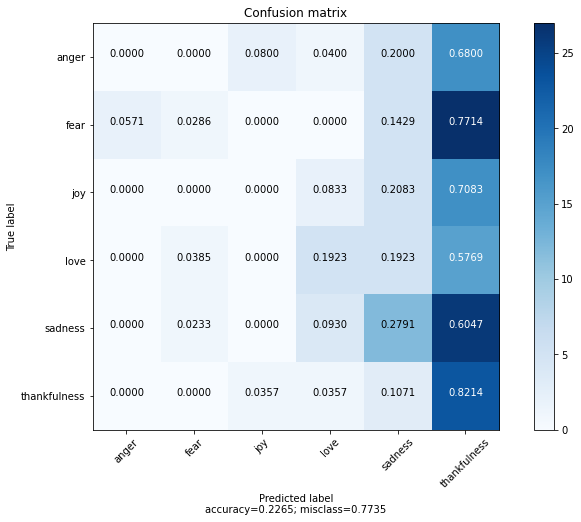

In [39]:
target_names = []
for k, v in category_dict.items(): target_names.append(v)
plot_confusion_matrix(cm=confusion, target_names=target_names, title='Confusion matrix')

In [40]:
# plt.figure(figsize=(10,6))
# sns.heatmap(confusion, annot=True, linewidths=.3)
# plt.show()

### Precision-Recall Report
<div>
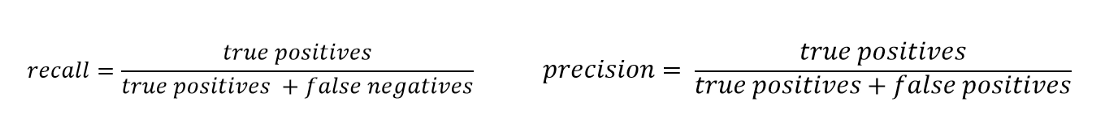
</div>

In [41]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [42]:
print(classification_report(og_df["emotions_cat"], pred_df["pred_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        25
        fear       0.33      0.03      0.05        35
         joy       0.00      0.00      0.00        24
        love       0.38      0.19      0.26        26
     sadness       0.34      0.28      0.31        43
thankfulness       0.18      0.82      0.30        28

    accuracy                           0.23       181
   macro avg       0.21      0.22      0.15       181
weighted avg       0.23      0.23      0.17       181



## Exporting Results

In [43]:
# pred_df[["text","pred"]].to_csv("results/peter_pan_emotions_predictions.csv", index=False)

In [44]:
# og_df.head(2)
# pred_df.head(2)

In [45]:
final_df = pd.merge(og_df, pred_df, on='text', how='left')

In [46]:
final_df.head()

,text,emotions,count_x,emotions_cat,pred,count_y,pred_cat
0,on ordinary occasions the boys would have swum...,joy,24,2,sadness,35,4
1,"what is it? he cried, shrinking",fear,35,1,thankfulness,125,5
2,she drifted in one direction and he was borne ...,joy,24,2,thankfulness,125,5
3,"'thank you, peter.'",thankfulness,28,5,joy,3,2
4,i don't want to go to school and learn solemn ...,love,26,3,sadness,35,4


In [47]:
anger = final_df[(final_df["emotions"]=="anger") & (final_df["pred"]=="anger")]
anger

,text,emotions,count_x,emotions_cat,pred,count_y,pred_cat


In [48]:
fear = final_df[(final_df["emotions"]=="fear") & (final_df["pred"]=="fear")]
fear

,text,emotions,count_x,emotions_cat,pred,count_y,pred_cat
13,"'me tiger lily,' that lovely creature would re...",fear,35,1,fear,3,1


In [49]:
joy = final_df[(final_df["emotions"]=="joy") & (final_df["pred"]=="joy")]
joy

,text,emotions,count_x,emotions_cat,pred,count_y,pred_cat


In [50]:
love = final_df[(final_df["emotions"]=="love") & (final_df["pred"]=="love")]
love

,text,emotions,count_x,emotions_cat,pred,count_y,pred_cat
33,"'if the redskins have won,' he said, 'they wil...",love,26,3,love,13,3
90,still it is best to be careful; and no one kno...,love,26,3,love,13,3
93,i should love you in a beard,love,26,3,love,13,3
107,"i know where it is, father, wendy cried, alway...",love,26,3,love,13,3
175,"That's Michael, she said, and she stretched ou...",love,26,3,love,13,3


In [51]:
sadness = final_df[(final_df["emotions"]=="sadness") & (final_df["pred"]=="sadness")]
sadness

,text,emotions,count_x,emotions_cat,pred,count_y,pred_cat
10,wendy would have cried if michael had not been...,sadness,43,4,sadness,35,4
18,"'tootles,' she cried, 'i appeal to you.'",sadness,43,4,sadness,35,4
19,he stood motionless one hand to his ear.,sadness,43,4,sadness,35,4
52,'do you mean we shall both be drowned?',sadness,43,4,sadness,35,4
73,"'at once,' wendy replied resolutely, for the h...",sadness,43,4,sadness,35,4
102,to all mrs. darling's dear invitations to him ...,sadness,43,4,sadness,35,4
116,"starkey looked round for help, but all deserte...",sadness,43,4,sadness,35,4
120,me no let pirates hurt him.,sadness,43,4,sadness,35,4
124,i don't want to go to school and learn solemn ...,sadness,43,4,sadness,35,4
152,"'no,' he answered, pretending indifference, 'i...",sadness,43,4,sadness,35,4


In [52]:
thankfulness = final_df[(final_df["emotions"]=="thankfulness") & (final_df["pred"]=="thankfulness")]
thankfulness

,text,emotions,count_x,emotions_cat,pred,count_y,pred_cat
8,not the pain of this but its unfairness was wh...,thankfulness,28,5,thankfulness,125,5
11,then at last he understood and clutched the ne...,thankfulness,28,5,thankfulness,125,5
20,luff you lubber cried an irish voice that was ...,thankfulness,28,5,thankfulness,125,5
22,"i forget whether they found it, but at any rat...",thankfulness,28,5,thankfulness,125,5
34,he often said stocks were up and shares were d...,thankfulness,28,5,thankfulness,125,5
40,i suppose she must have looked rather delightful,thankfulness,28,5,thankfulness,125,5
43,there was a break in his voice as if for a mom...,thankfulness,28,5,thankfulness,125,5
48,of course wendy was very elated over peter's c...,thankfulness,28,5,thankfulness,125,5
50,"peter was really the best dancer among them, b...",thankfulness,28,5,thankfulness,125,5
55,"but he was very honourable, and he sat on the ...",thankfulness,28,5,thankfulness,125,5


In [53]:
missed = final_df.loc[~(final_df['emotions'] == final_df['pred'])]
missed = missed[["text", "emotions", "pred"]]
missed

,text,emotions,pred
0,on ordinary occasions the boys would have swum...,joy,sadness
1,"what is it? he cried, shrinking",fear,thankfulness
2,she drifted in one direction and he was borne ...,joy,thankfulness
3,"'thank you, peter.'",thankfulness,joy
4,i don't want to go to school and learn solemn ...,love,sadness
...,...,...,...
174,He peeped in again to see why the music had st...,sadness,thankfulness
176,"Mr. Darling woke to share her bliss, and Nana ...",joy,sadness
178,I should love you in a beard; and Mrs. Darling...,love,sadness
179,"How lovely, cried Wendy so longingly that Mrs....",love,sadness


In [54]:
CORRECT_PRED_DIR = "results/peter_pan_thresh_0.4/peter_pan_correct_predictions"
MISSED_PRED_DIR = "results/peter_pan_thresh_0.4/peter_pan_missed_predictions"

ANGER_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/anger_correct_pred.csv"
FEAR_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/fear_correct_pred.csv"
JOY_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/joy_correct_pred.csv"
LOVE_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/love_correct_pred.csv"
SADNESS_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/sadness_correct_pred.csv"
THANKFULNESS_CORRECT_PRED_CSV = f"{CORRECT_PRED_DIR}/thankfulness_correct_pred.csv"
MISSED_PRED_CSV = f"{MISSED_PRED_DIR}/missed_pred.csv"

In [55]:
anger.to_csv(ANGER_CORRECT_PRED_CSV, index=False, mode="w+")
fear.to_csv(FEAR_CORRECT_PRED_CSV, index=False, mode="w+")
joy.to_csv(JOY_CORRECT_PRED_CSV, index=False, mode="w+")
love.to_csv(LOVE_CORRECT_PRED_CSV, index=False, mode="w+")
sadness.to_csv(SADNESS_CORRECT_PRED_CSV, index=False, mode="w+")
thankfulness.to_csv(THANKFULNESS_CORRECT_PRED_CSV, index=False, mode="w+")
missed.to_csv(MISSED_PRED_CSV, index=False, mode="w+")